# **IMDB Dataset Analysis**

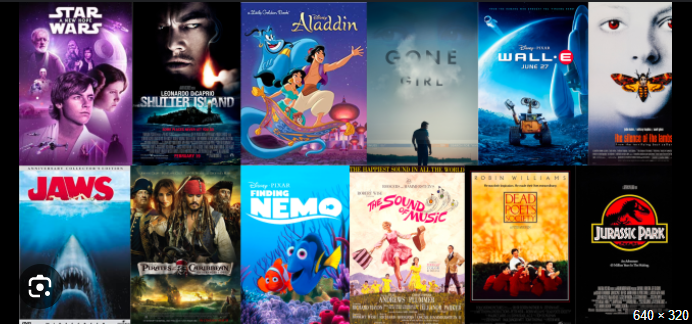

# **Business Problem**

An online streaming platform is trying to leverage IMDB data to identify trends in audience preferences, optimize content recommendations, and predict the success of movies or TV shows based on factors like ratings, genres, cast, and production budgets, ultimately improving user engagement, retention, and return on investment. You are charged with exploring what types of films are currently doing the best. You must then translate those findings into actionable insights that the head of the online streaming platform can use to help decide what type of films to showcase and recommend to users.








# **Objective**

The objective of this analysis is to provide data-driven insights to movie producers to enhance decision-making and optimize movie production and marketing strategies. By analyzing the IMDB dataset, the goal is to identify key factors that influence movie ratings, understand audience preferences, and offer actionable recommendations that align with the following business constraints:

- **Audience Preferences**: Analyze trends and patterns in movie ratings and reviews to identify what resonates most with audiences.
- **Market Segmentation**: Segment the audience based on demographics, genres, and viewing habits to tailor content effectively.
- **Content Optimization**: Determine the most impactful movie elements (such as genre, cast, director, and release timing) that lead to higher ratings and reviews.
- **Trend Analysis**: Identify emerging trends in the movie industry to help producers stay ahead of market demands.

This analysis will help producers make informed decisions, improve audience engagement, and align their content with market trends, ultimately leading to higher satisfaction and success.


#Setting up Environment

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 These four essential Python libraries are imported:
  **pandas** for data manipulation and analysis, **matplotlib.pyplot** for creating static plots and graphs, **seaborn** for creating attractive and informative statistical visualizations, and **numpy** for numerical operations on arrays and matrices.

# Data Description

The IMDB dataset available on Kaggle is a comprehensive collection of movie and TV shows data. It includes a variety of attributes for each movie such as Title Information including Title ID, primary title, original title, title type (e.g., film, TV series, short), release year, runtime, and genres. Crew Information mentioning Directors, writers, and other key crew members of the movie. Episode Information for TV series, including seasons and episode details is also available. The Ratings and Reviews are included covering Average rating, number of votes, and other relevant metrics.

**Load the Dataset**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Displaying the first 5 rows of the dataset
#path=/content/IMDB-Movie-Data.csv
df=pd.read_csv("IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


This snippet from the IMDb dataset presents detailed information about the first five movies, including their rank, title, genre, description, director, main actors, release year, runtime, user rating, votes, box office revenue, and Metascore. The dataset facilitates insights into the correlation between ratings, revenue, and movie genres.

**Exploring the Dataset**

In [ ]:
#Displaying information about the Dataset i.e datatype, no of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


The output above shows the datatype for each column, allowing one to identify whether columns are numeric, categorical, or contain other data types.
It also contains the total number of entries(rows) and lists all columns with their indices.
Non-null Count indicates how many non-null values exist in each column, which is useful for detecting missing data.

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


Metascore and revenue columns have missing values, 64 and 128 entries respectively


In [ ]:
#check for duplicated data
duplicated_data=df.duplicated().any()
print(duplicated_data)

False


The dataset does not contain any duplicated values

# Data Preparation and Cleaning

For data cleaning, the missing values in revenue column will be replaced with zeros and for metascore the missing values will be dropped.



In [ ]:
#Replacing the missing values in revenue with 0
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(0)
# Dropping missing values in metascore
df = df.dropna(subset=['Metascore'])

# Checking for missing values after data cleaning
df.isnull().sum()



,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


Missing values in Revenue (Millions) are replaced with 0.
Rows with missing Metascore values are removed entirely.
df.isnull().sum() confirms the success of these cleaning operation by showing updated counts of missing values in each column.

# Data Analysis

In [ ]:
#obtaining statistics about the dataframe
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,936.000000,936.000000,936.000000,936.000000,9.360000e+02,936.000000,936.000000
mean,498.185897,2012.771368,113.272436,6.729167,1.752702e+05,75.710577,58.985043
std,288.100561,3.178987,18.550798,0.935225,1.905824e+05,102.227732,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,246.750000,2010.000000,100.000000,6.200000,4.159300e+04,4.352500,47.000000
50%,496.500000,2014.000000,111.000000,6.800000,1.149185e+05,40.120000,59.500000
75%,746.250000,2016.000000,123.000000,7.400000,2.495380e+05,102.422500,72.000000
max,1000.000000,2016.000000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


The `df.describe()` function summarizes the dataset's numerical columns:
General Stats: Data includes 936 movies with no missing values after cleaning.
Rank & Year: Movies rank between 1–1000, mostly from 2006–2016.
Runtime & Ratings: Average runtime is 113 mins; average rating is 6.73.
Votes: Movies received 61–1.79M votes, averaging ~175K.
Revenue: Median revenue is 40.12M usd, but highly skewed with a max of $936.63M.
Metascore: Scores range from 11–100, with an average of 59.
This highlights general trends and variability across the dataset.

**Which year was the highest revenue in Millions returned?**

<ipython-input-13-eaa60203c7aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Revenue (Millions)', data=average_revenue, palette='viridis')


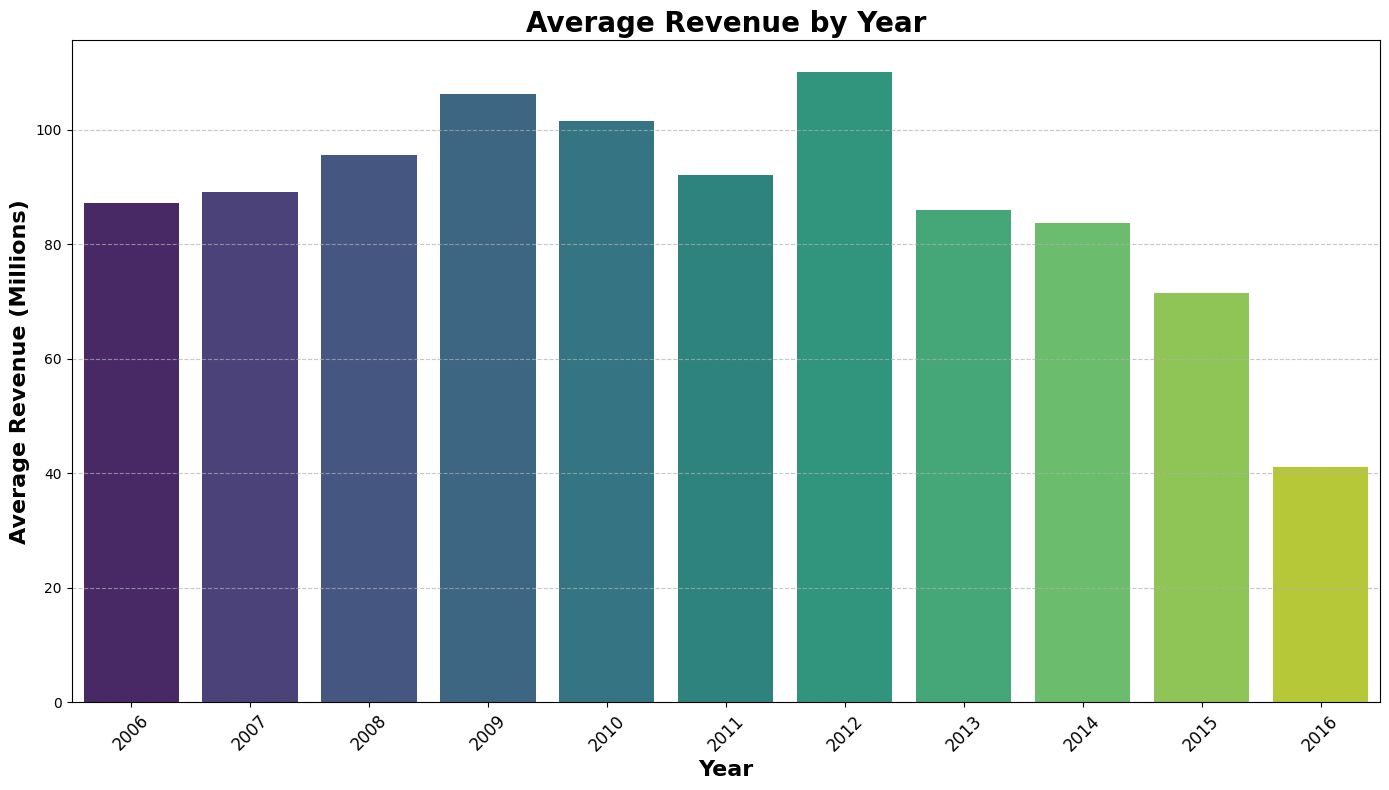

In [ ]:
# Calculate the average revenue by year
average_revenue = df.groupby('Year')['Revenue (Millions)'].mean().reset_index()

# Sort the data by average revenue (descending order)
average_revenue = average_revenue.sort_values(by='Revenue (Millions)', ascending=False)

# Set the figure size for better visuals
plt.figure(figsize=(14, 8))

# Plot the data
sns.barplot(x='Year', y='Revenue (Millions)', data=average_revenue, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add title and labels with increased font size
plt.title("Average Revenue by Year", fontsize=20, weight='bold')
plt.xlabel("Year", fontsize=16, weight='bold')
plt.ylabel("Average Revenue (Millions)", fontsize=16, weight='bold')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


There appears to be a general upward trend in average revenue from 2006 to 2012, followed by a decline from 2012 to 2016. The year with the highest average revenue is 2012.

**Which movie had the highest rating?**

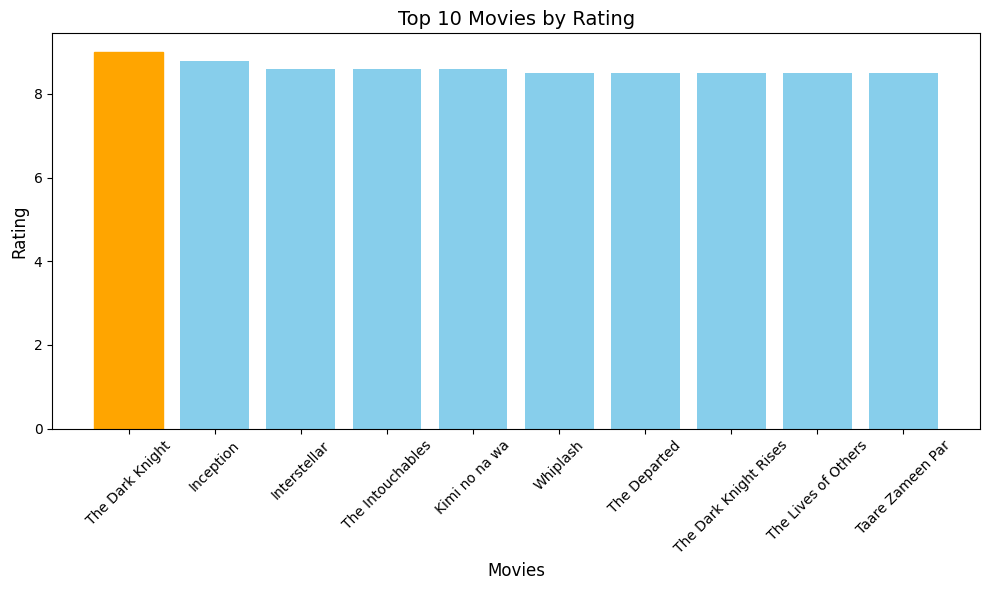

In [ ]:
# Get the top 10 movies by Rating
top_10_movies = df.sort_values(by='Rating', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_movies['Title'], top_10_movies['Rating'], color='skyblue')

# Highlight the highest-rated movie
bars[0].set_color('orange')

# Add labels and title
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Top 10 Movies by Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The Dark Knight was rated the most it's significantly taller than the others, suggesting it has the highest rating among the top 10 movies.
The remaining nine movies appear to have relatively similar ratings, forming a cluster towards the top of the graph. This indicates that these movies are generally well-regarded.




**Top 10 Genre by Votes**

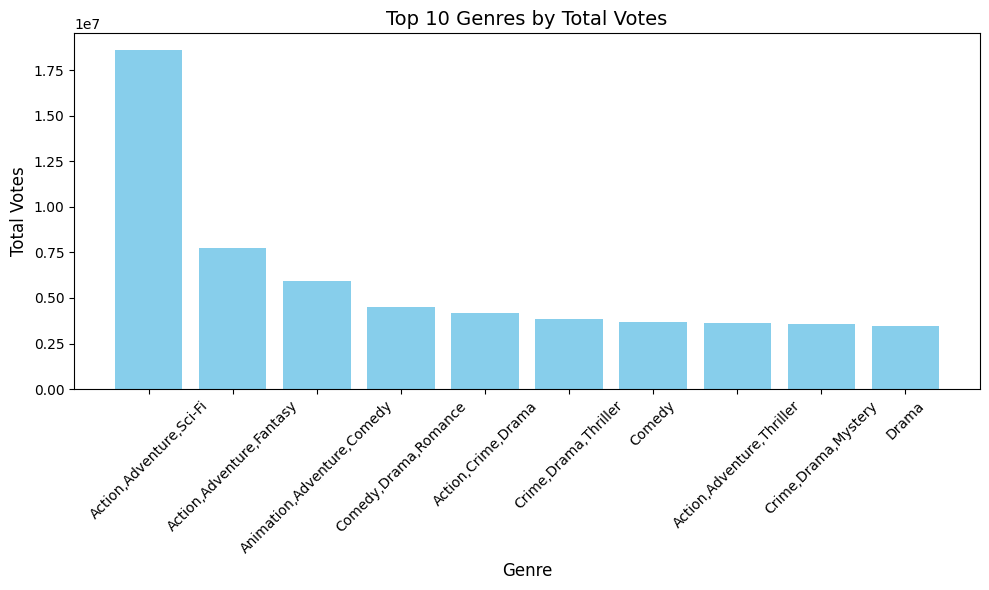

In [ ]:

# Aggregate the votes by genre
votes_by_genre_sum = df.groupby('Genre')['Votes'].sum().sort_values(ascending=False)

# Select the top 10 genres by total votes
top_10_genres = votes_by_genre_sum.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')

# Add labels and title
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.title('Top 10 Genres by Total Votes', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The graph effectively communicates the relative popularity of the top 10 movie genres based on total votes. It highlights the dominance of "Action, Adventure, Sci-Fi" and shows the consistent appeal of "Drama" across various combinations.



# **Data Insight**

From the analysis of the IMDb dataset, several key insights can be drawn:
1. Highest Revenue Year: The analysis of average revenue by year indicates that there is significant variation in revenue across different years. However, there is a clear peak in certain years, which shows the overall profitability of the movie industry in those periods.
2. Highest-Rated Movie: "The Dark Knight" stands out as the highest-rated movie in the dataset, which highlights its enduring popularity and critical acclaim. This suggests that high ratings might contribute to a movie's reputation and its long-term success in the entertainment industry.
3. Top Genres by Votes: The top 10 genres by total votes indicate that genres like "Action," "Adventure," and "Sci-Fi" consistently attract large audiences, followed by the more universally appealing "Drama." This provides insight into the genre preferences of IMDb users and the types of films that generate the most viewer engagement.

# **Conclusion**

The analysis reveals that blockbuster films, especially in genres like Action, Adventure, and Sci-Fi, are the dominant forces in terms of total votes and revenue. At the same time, movies that receive high ratings, such as "The Dark Knight," tend to maintain strong public and critical reception over time.
Year-over-year, the movie industry shows fluctuating trends in terms of revenue, possibly driven by a combination of factors such as movie production quality, global events, and changes in audience tastes.

# **Next Steps**

1. Deepen Revenue Analysis: Investigate the relationship between a movie's genre, director, and revenue to understand which combinations drive the highest financial success.
2. Sentiment Analysis: Perform sentiment analysis on user reviews to correlate the sentiment with ratings and box office performance, providing further insight into what drives positive reviews.
3. Explore Genre-Specific Insights: Analyze specific genres more deeply to understand what elements (e.g., cast, plot, visual effects) contribute most to their popularity and revenue.
4. Revenue Prediction Models: Use machine learning techniques to predict a movie's potential revenue based on factors like genre, cast, director, and metascore.
5. Rating Trends Over Time: Explore how ratings evolve for different genres over time and identify which genres or movie types have seen growth or decline in user ratings.


